In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 989.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 65.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 13.5 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
  

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
#Needs inline to get the graph
plt.style.use("seaborn")
import seaborn as sns


In [4]:
df =pd.DataFrame(index=[2016, 2017, 2018], data=[100,50,95], columns=["Price"])
df

,Price
2016,100
2017,50
2018,95


In [5]:
simplereturns = df.pct_change().dropna()
simplereturns

,Price
2017,-0.5
2018,0.9


In [6]:
simplereturns.mean() #Does not calculate it from beginning to end, but checks the two 

Price    0.2
dtype: float64

In [7]:
100*1.2*1.2
#This shows that mean returns are misleading 

144.0

In [8]:
logreturns = np.log(df/df.shift(1)).dropna()
logreturns

,Price
2017,-0.693147
2018,0.641854


In [9]:
logreturns.mean()

Price   -0.025647
dtype: float64

In [10]:
100*np.exp(logreturns.mean()*2) #Ending returns

Price    95.0
dtype: float64

In [11]:

spy = yf.download('SPY')

spy


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-01-29,43.968750,43.968750,43.750000,43.937500,25.218218,1003200
1993-02-01,43.968750,44.250000,43.968750,44.250000,25.397581,480500
1993-02-02,44.218750,44.375000,44.125000,44.343750,25.451401,201300
1993-02-03,44.406250,44.843750,44.375000,44.812500,25.720430,529400
1993-02-04,44.968750,45.093750,44.468750,45.000000,25.828043,531500
...,...,...,...,...,...,...
2023-02-16,408.790009,412.910004,408.140015,408.279999,408.279999,76431500
2023-02-17,406.059998,407.510010,404.049988,407.260010,407.260010,89169100
2023-02-21,403.059998,404.160004,398.820007,399.089996,399.089996,82655900


In [12]:
close_spy = spy.Close.to_frame()
close_spy

,Close
Date,
1993-01-29,43.937500
1993-02-01,44.250000
1993-02-02,44.343750
1993-02-03,44.812500
1993-02-04,45.000000
...,...
2023-02-16,408.279999
2023-02-17,407.260010
2023-02-21,399.089996


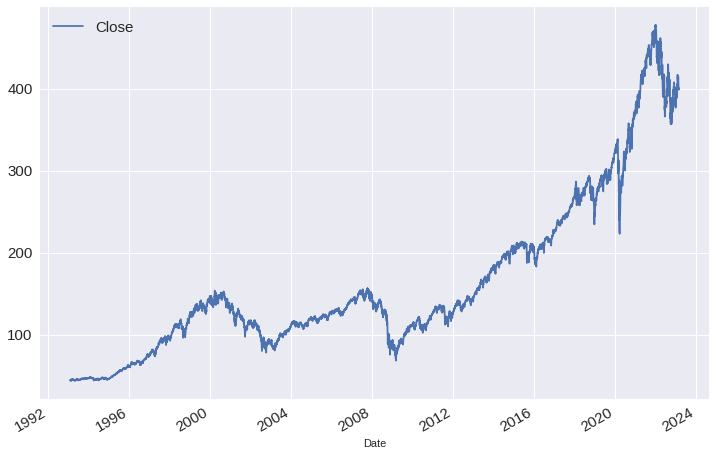

In [13]:
close_spy.plot(figsize=(12,8), fontsize=15)
plt.legend(loc="upper left", fontsize=15)

In [14]:
spy_roll =close_spy.rolling(window=10)

spy_roll = spy_roll.mean()
spy_roll.head(15)

,Close
Date,
1993-01-29,NaN
1993-02-01,NaN
1993-02-02,NaN
1993-02-03,NaN
1993-02-04,NaN
1993-02-05,NaN
1993-02-08,NaN
1993-02-09,NaN
1993-02-10,NaN


In [15]:
spy_median = close_spy.rolling(window=10).median()
spy_median

,Close
Date,
1993-01-29,NaN
1993-02-01,NaN
1993-02-02,NaN
1993-02-03,NaN
1993-02-04,NaN
...,...
2023-02-16,411.500000
2023-02-17,410.239990
2023-02-21,409.464996


In [16]:
spy_max = close_spy.rolling(window=10, min_periods = 5).max()
spy_max

,Close
Date,
1993-01-29,NaN
1993-02-01,NaN
1993-02-02,NaN
1993-02-03,NaN
1993-02-04,45.000000
...,...
2023-02-16,415.190002
2023-02-17,415.190002
2023-02-21,415.190002


In [17]:
#Find the 50 day moving average
close_spy["SMA50"] = close_spy.rolling(window=50, min_periods = 50).mean()

In [18]:
close_spy

,Close,SMA50
Date,,
1993-01-29,43.937500,NaN
1993-02-01,44.250000,NaN
1993-02-02,44.343750,NaN
1993-02-03,44.812500,NaN
1993-02-04,45.000000,NaN
...,...,...
2023-02-16,408.279999,396.329199
2023-02-17,407.260010,396.597800
2023-02-21,399.089996,396.716400


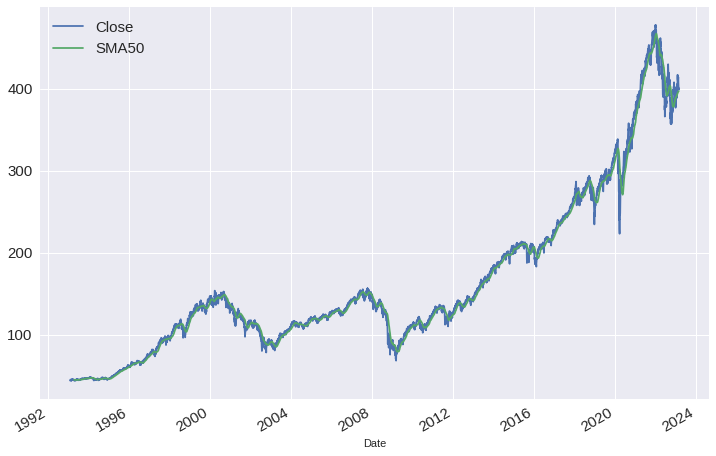

In [19]:
close_spy.plot(figsize=(12,8), fontsize=15)
plt.legend(loc="upper left", fontsize=15)

In [20]:
#Find the 50 day moving average
close_spy["SMA200"] = close_spy.Close.rolling(window=200, min_periods = 200).mean()


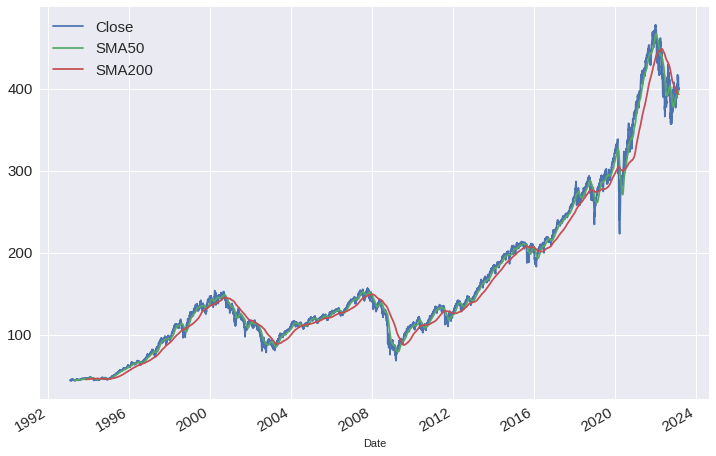

In [21]:
close_spy.plot(figsize=(12,8), fontsize=15)
plt.legend(loc="upper left", fontsize=15)

Challange 2

In [22]:
ticker = ["MSFT", "AAPL", "GOOGL", "KO", "DIS", "IBM"]
stocks = yf.download(["MSFT"])
stocks



[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060657,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062823,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063907,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062281,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061198,47894400
...,...,...,...,...,...,...
2023-02-16,264.019989,266.739990,261.899994,262.149994,262.149994,29603600
2023-02-17,259.390015,260.089996,256.000000,258.059998,258.059998,29979600
2023-02-21,254.479996,255.490005,251.589996,252.669998,252.669998,28397400


In [23]:
microsoft = stocks.Close.to_frame()
microsoft

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2023-02-16,262.149994
2023-02-17,258.059998
2023-02-21,252.669998


In [24]:
#50 day average and 200 days

microsoft["SMA50"] = microsoft.rolling(window=50, min_periods = 50).mean()
microsoft["SMA200"] = microsoft.Close.rolling(window=200, min_periods = 200).mean()

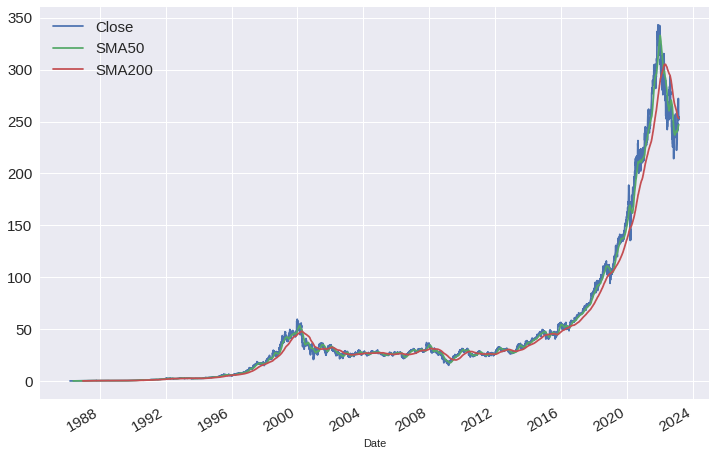

In [25]:
microsoft.plot(figsize=(12,8), fontsize=15)
plt.legend(loc="upper left", fontsize=15)

In [26]:
microsoft["EMW100"] = microsoft.Close.ewm(span=100, min_periods = 100).mean()

In [27]:
microsoft

,Close,SMA50,SMA200,EMW100
Date,,,,
1986-03-13,0.097222,NaN,NaN,NaN
1986-03-14,0.100694,NaN,NaN,NaN
1986-03-17,0.102431,NaN,NaN,NaN
1986-03-18,0.099826,NaN,NaN,NaN
1986-03-19,0.098090,NaN,NaN,NaN
...,...,...,...,...
2023-02-16,262.149994,246.252800,253.49315,248.935928
2023-02-17,258.059998,246.511600,253.37455,249.116603
2023-02-21,252.669998,246.677600,253.18800,249.186967


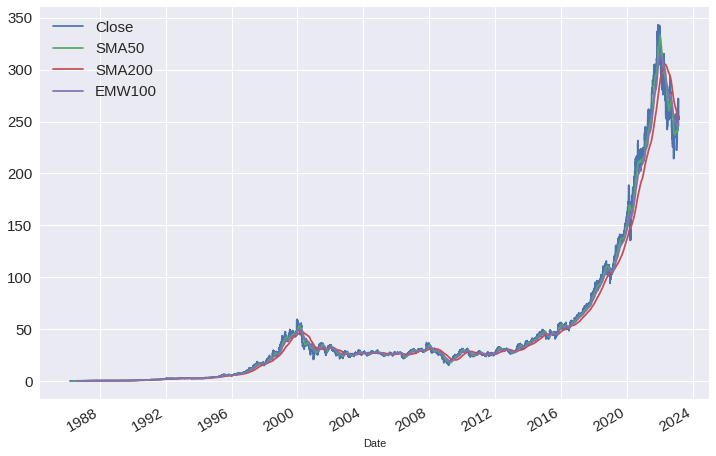

In [28]:
microsoft.plot(figsize=(12,8), fontsize=15)
plt.legend(loc="upper left", fontsize=15)

In [29]:
microsoft["Day"] = microsoft.index.day_name()



In [30]:
microsoft["Quarter"] = microsoft.index.quarter

In [31]:
microsoft = yf.download("MSFT")

[*********************100%***********************]  1 of 1 completed


In [32]:
microsoft = microsoft.to_frame()

AttributeError: ignored

In [ ]:
all_day = pd.date_range(start = "2010-12-31", end="2020-01-01", freq="D")
all_day

In [ ]:
microsoft

In [ ]:
microsoft = microsoft.reindex(all_day)

microsoft

In [ ]:
microsoft.fillna